<a href="https://colab.research.google.com/github/joseph-c-mcguire/Math-of-data-science/blob/main/MATH_476_Graph_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Graph

A simple, un-weighted, undirected graph with nodes: $V = \{0,1,2\}$.

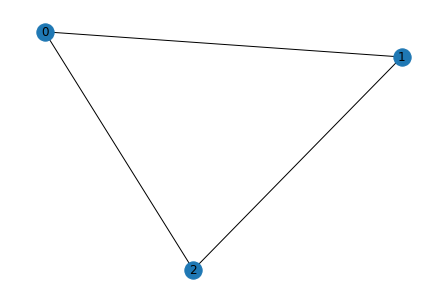

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


G = nx.Graph()
V = range(0,2)
E = [(0,1),(0,2),(1,2)]
G.add_nodes_from(V)
G.add_edges_from(E)
fig = plt.figure(1)

nx.draw(G, with_labels = True)

plt.savefig('undirected_graph.png', Format = 'PNG')

# Zachary Karate Club

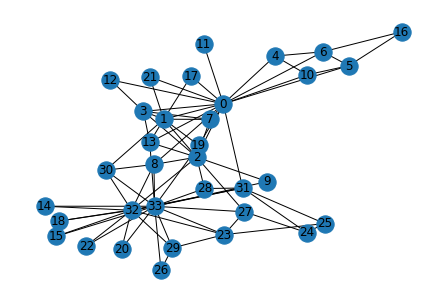

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
fig = plt.figure(1)

nx.draw(G, with_labels = True)

plt.savefig('karate_club.png', Format = 'PNG')

# Communities

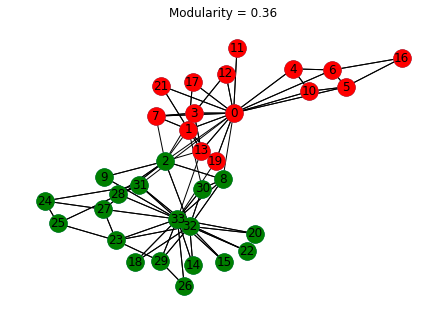

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community

G = nx.karate_club_graph()
communities_generator = community.girvan_newman(G)

fig = plt.figure(1)

pos = nx.spring_layout(G)

nx.draw(G, pos = pos, with_labels = True)

top_level_communities = next(communities_generator)
nx.draw(G.subgraph(top_level_communities[0]), pos = pos, node_color = 'red')
nx.draw(G.subgraph(top_level_communities[1]), pos = pos, node_color = 'green')

plt.title('Modularity = ' + str(round(community.modularity(G,next(community.girvan_newman(G))),2)))
plt.savefig('karate_club_communities.png', Format = 'PNG')

# Directed Graph

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])

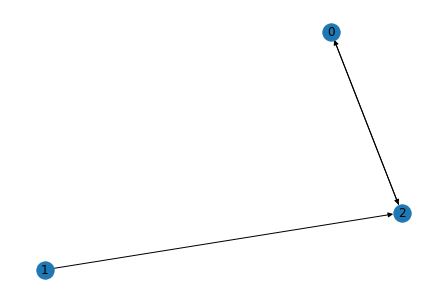

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.random_k_out_graph(3, 1, alpha=0.1, seed = 0,self_loops=False)
fig = plt.figure(1)

nx.draw(G, with_labels = True)

plt.savefig('directed_graph.png', Format = 'PNG')
nx.to_numpy_matrix(G)

# Weighted Graph Example


0 2 4
0 3 0
2 3 3
4 2 5
0 3 2


matrix([[0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 9., 0., 0.],
        [3., 0., 2., 3.]])

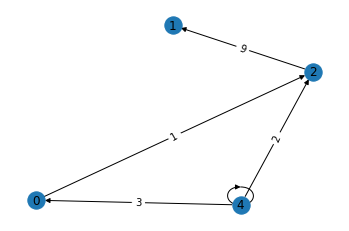

In [ ]:
import networkx as nx
import numpy.random as rand
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_nodes_from(range(0,3))

for i in range(0,5):
  print(rand.randint(0,5), rand.randint(0,5), rand.randint(0,10))
  G.add_weighted_edges_from([(rand.randint(0,5), rand.randint(0,5), rand.randint(0,10))])

fig = plt.figure(1)

pos = nx.spring_layout(G)

labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=labels)
nx.draw(G, pos = pos, with_labels = True)


plt.savefig('weighted_digraph.png', Format = 'PNG')
nx.to_numpy_matrix(G)

# Connected versus Unconnected

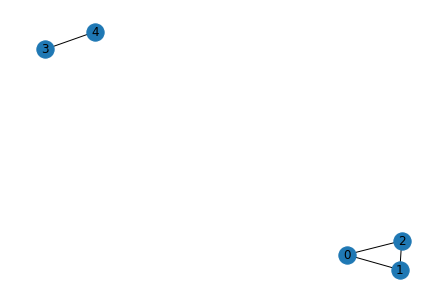

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
V = range(0,5)
E = [(0,1),(0,2),(1,2), (3,4)]


G.add_nodes_from(V)
G.add_edges_from(E)
fig = plt.figure(1)
pos = nx.spring_layout(G)

nx.draw(G, pos = pos, with_labels = True)

plt.savefig('disconnected_graph.png', Format = 'PNG')

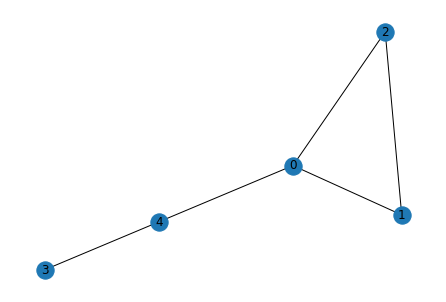

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
V = range(0,5)
E = [(0,1),(0,2),(1,2), (3,4),(4,0)]


G.add_nodes_from(V)
G.add_edges_from(E)
fig = plt.figure(1)
pos = nx.spring_layout(G)

nx.draw(G, pos = pos, with_labels = True)

plt.savefig('connected_graph.png', Format = 'PNG')

# Planted Partition Model

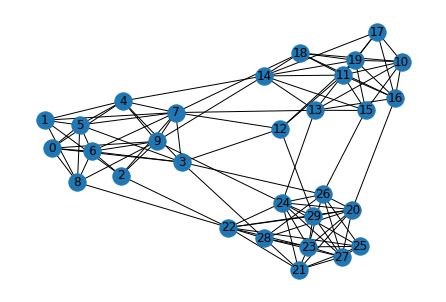

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

sizes = [10, 10, 10]
probs = [[0.75, 0.05, 0.05],
         [0.05, 0.75, 0.05],
         [0.05, 0.05, 0.75]]

G = nx.stochastic_block_model(sizes, probs, seed=0)
fig = plt.figure(1)

nx.draw(G, with_labels = True)

plt.savefig('sbm.png', Format = 'PNG')

# Random Graph

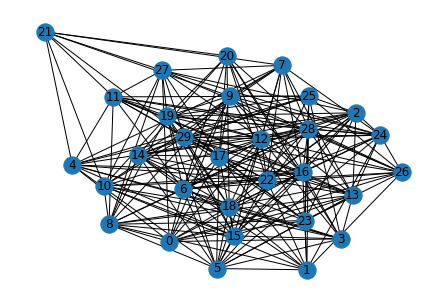

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

sizes = [10, 10, 10]
probs = [[0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5]]

G = nx.stochastic_block_model(sizes, probs, seed=0)
fig = plt.figure(1)

nx.draw(G, with_labels = True)

plt.savefig('random_graph.png', Format = 'PNG')

# Paths

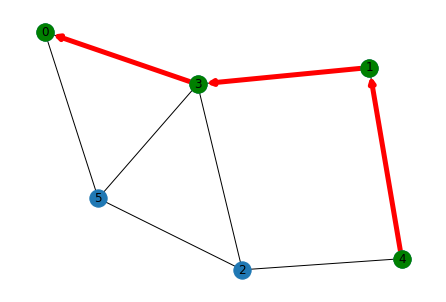

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

sizes = [2, 2, 2]
probs = [[0.05, 0.5, 0.5],
         [0.5, 0.5, 0.5],
         [0.5, 0.5, 0.5]]


G = nx.stochastic_block_model(sizes, probs, seed=0)
fig = plt.figure(1)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, with_labels = True)

path_graph = nx.DiGraph()
path_graph.add_edges_from([(4,1),(1,3),(3,0)])

nx.draw(path_graph, edge_color = 'red', pos = pos, node_color = 'green', width = 5)

plt.savefig('path.png', Format = 'PNG')

# Modularity Examples

0.39941827735034724


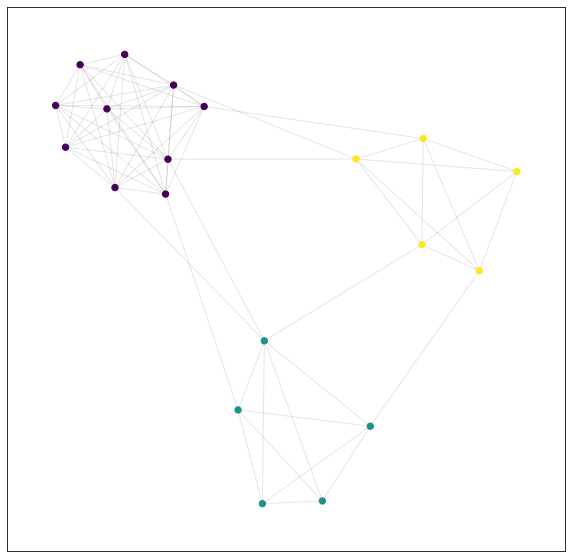

0.39941827735034724


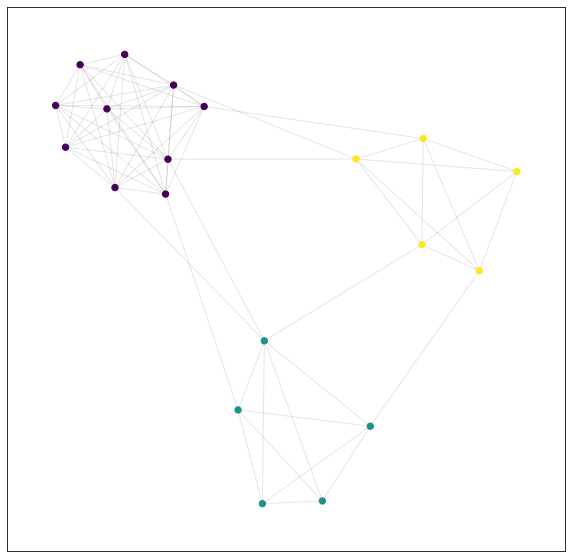

In [ ]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import networkx as nx

sizes = [10, 5, 5]
p = 1
q = 0.05
k = 3
probs = q * np.ones(shape = (k,k))
np.fill_diagonal(probs, p)
G = nx.stochastic_block_model(sizes, probs, seed=0)
pos = nx.spring_layout(G)
# compute the best partition
partition = community_louvain.best_partition(G, resolution = 0.01)
nx_comm.label_propagation_communities(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(1, figsize=(10,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                     cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)
print(community_louvain.modularity(partition, G))
plt.show()

plt.figure(2, figsize = (10,10))
comm_g = next(nx_comm.girvan_newman(G))
nx.draw_networkx_nodes(G, pos, node_size=40,
                     cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)
print(community_louvain.modularity(partition, G))
plt.show()

# Louvain Algorithm

In [ ]:
! pip install cdlib
! pip install community
! pip install python_louvain
! pip uninstall community

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.7/dist-packages/community/community_status.py
Proceed (y/n)? y
  Successfully uninstalled community-1.0.0b1


In [ ]:
from cdlib.classes.node_clustering import NodeClustering
import community.community_louvain as community_louvain
from cdlib import algorithms, viz
import cdlib as cd
from collections import defaultdict

def louvain(
    g_original: object,
    weight: str = "weight",
    resolution: float = 1.0,
    randomize: int = None) -> NodeClustering:
    """
    Louvain  maximizes a modularity score for each community.
    The algorithm optimises the modularity in two elementary phases:
    (1) local moving of nodes;
    (2) aggregation of the network.
    In the local moving phase, individual nodes are moved to the community that yields the largest increase in the quality function.
    In the aggregation phase, an aggregate network is created based on the partition obtained in the local moving phase.
    Each community in this partition becomes a node in the aggregate network. The two phases are repeated until the quality function cannot be increased further.


    **Supported Graph Types**

    ========== ======== ========
    Undirected Directed Weighted
    ========== ======== ========
    Yes        No       No
    ========== ======== ========

    :param g_original: a networkx/igraph object
    :param weight: str, optional the key in graph to use as weight. Default to 'weight'
    :param resolution: double, optional  Will change the size of the communities, default to 1.
    :param randomize: int, RandomState instance or None, optional (default=None). If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.
    :return: NodeClustering object


    :Example:

    >>> from cdlib import algorithms
    >>> import networkx as nx
    >>> G = nx.karate_club_graph()
    >>> coms = algorithms.louvain(G, weight='weight', resolution=1.)

    :References:

    Blondel, Vincent D., et al. `Fast unfolding of communities in large networks. <https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/meta/>`_ Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.

    .. note:: Reference implementation: https://github.com/taynaud/python-louvain
    """
    g = g_original
    coms = community_louvain.best_partition(
        g, weight=weight, resolution=resolution, randomize=randomize
    )

    # Reshaping the results
    coms_to_node = defaultdict(list)
    for n, c in coms.items():
        coms_to_node[c].append(n)

    coms_louvain = [list(c) for c in coms_to_node.values()]
    return cd.NodeClustering(
        coms_louvain,
        g_original,
        "Louvain",
        method_parameters={
            "weight": weight,
            "resolution": resolution,
            "randomize": randomize,
        },
    )
  

Text(0.5, 1.0, 'Modularity = 0.42')

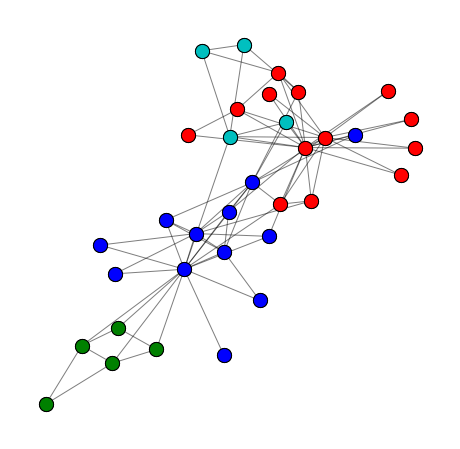

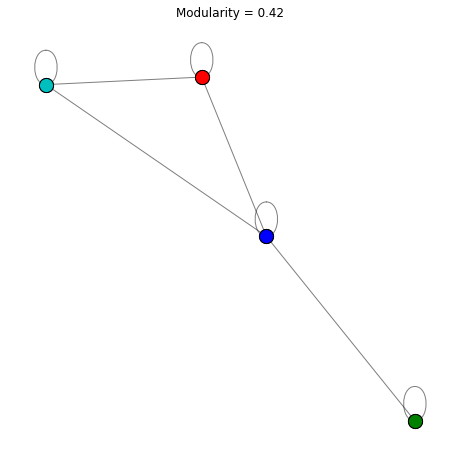

In [ ]:
from cdlib import algorithms,viz
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()
coms = louvain(G,resolution = 1)
viz.plot_network_clusters(G,coms)
viz.plot_community_graph(G,coms)

plt.title('Modularity = ' + str(
round(coms.newman_girvan_modularity().score,2)))

# Cuts


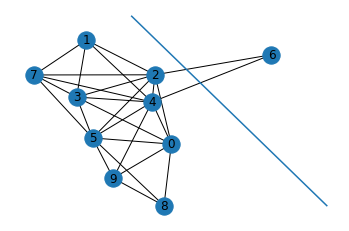

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.random_geometric_graph(10, radius = 0.5,seed = 0)
pos = nx.spring_layout(G)

plt.figure(1)
x = np.linspace(0,1)
y = -2*x+1
plt.plot(x,y)
nx.draw(G, pos = pos, with_labels = True)
plt.savefig('cuts.png', Format = 'PNG')

# Spectral Clustering